In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

%cd "/content/drive/MyDrive/Projects/yolo_count"

/content/drive/MyDrive/Projects/yolo_count


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data= /content/drive/MyDrive/Projects/yolo_count/data.yml epochs=50 imgsz=512 plots=True

Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Projects/yolo_count/data.yml, epochs=50, time=None, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

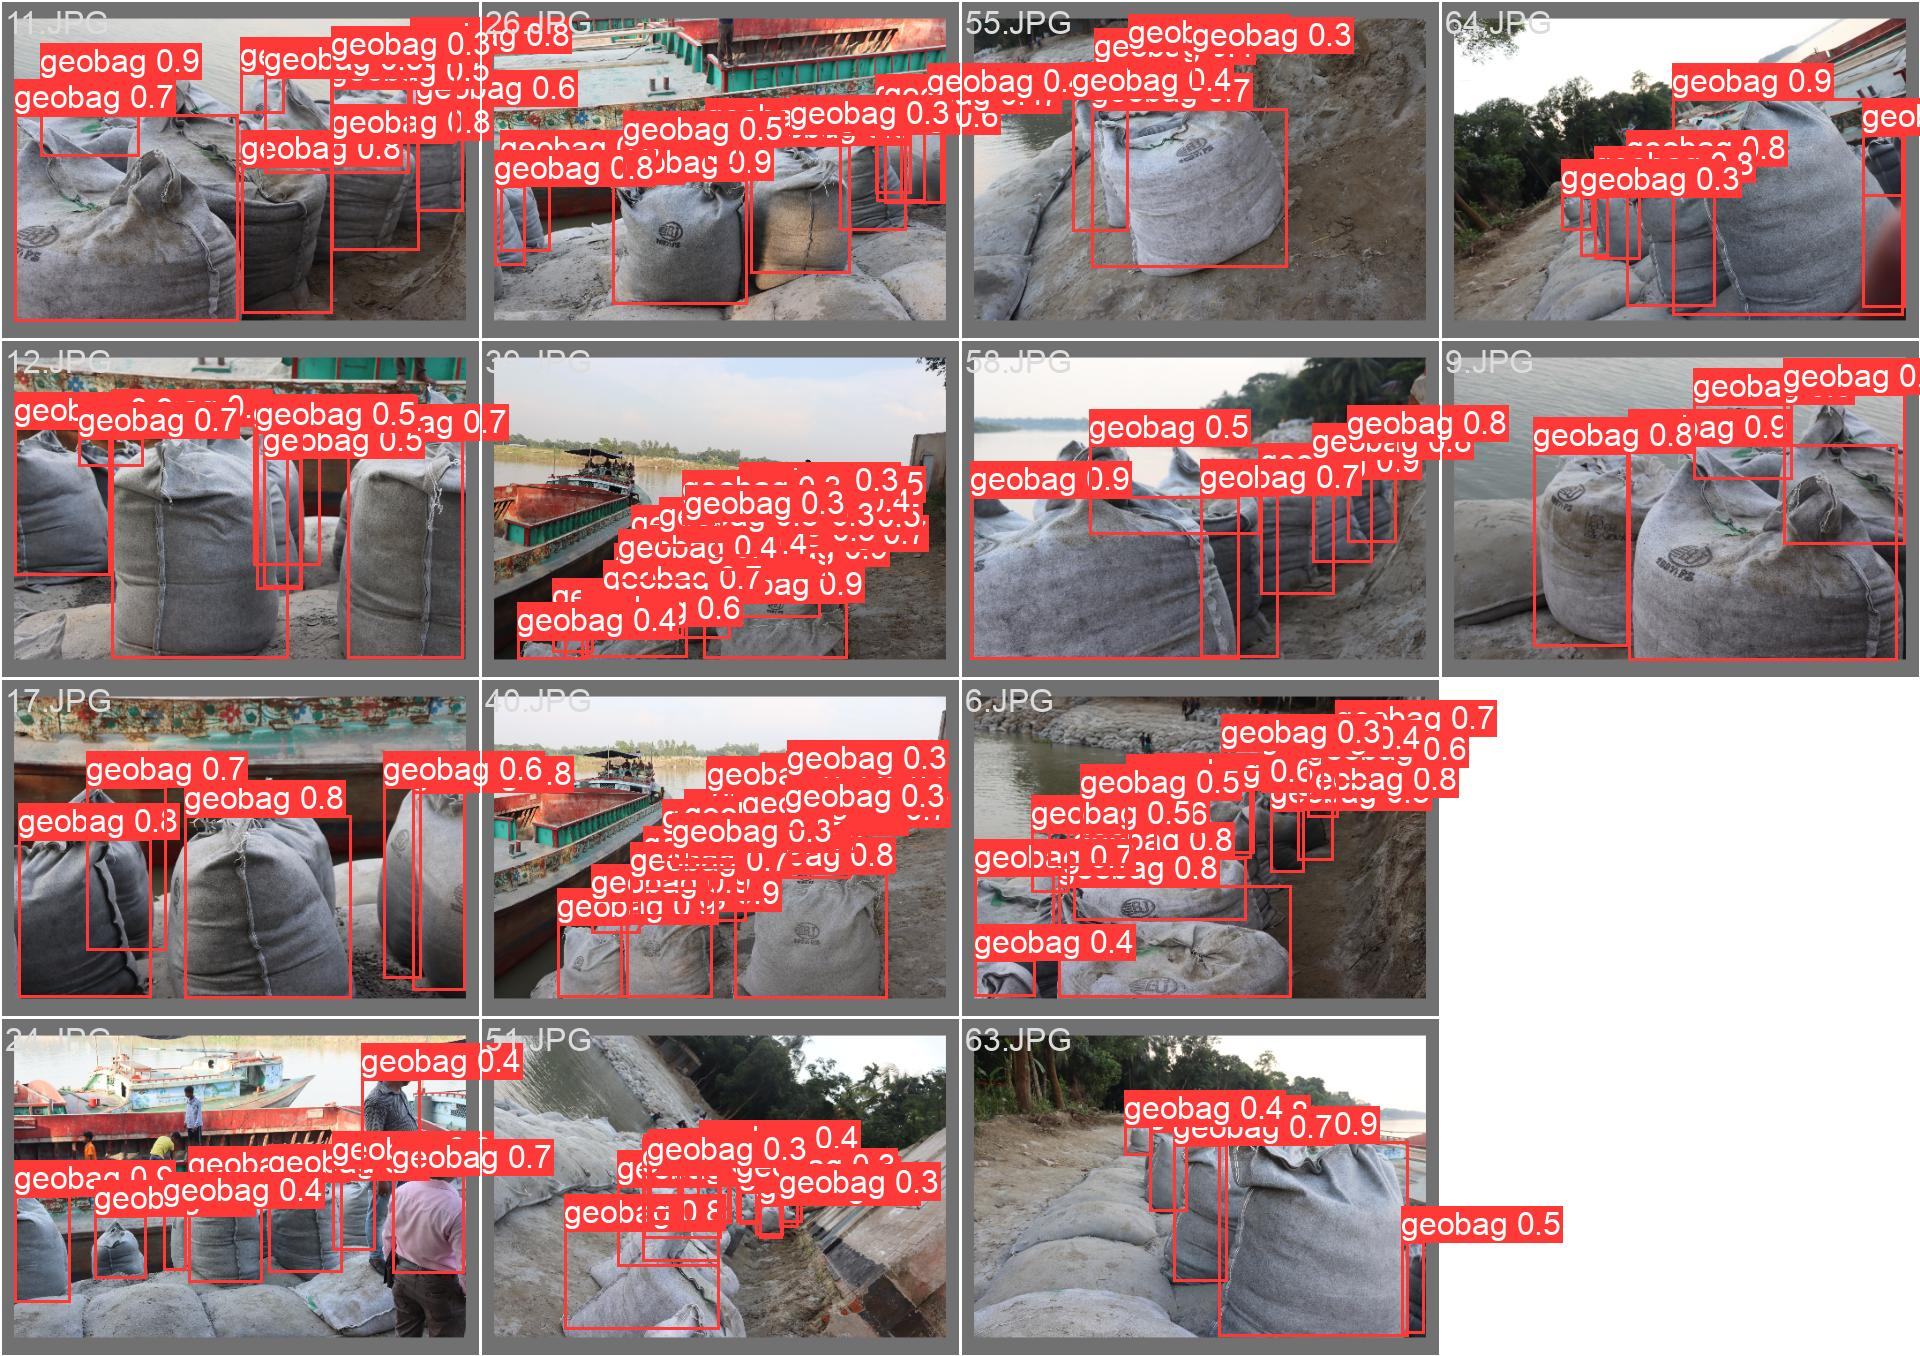

In [ ]:

from IPython.display import display, Image

Image(filename='/content/drive/MyDrive/Projects/yolo_count/runs/detect/train14/val_batch0_pred.jpg', width=1200)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Projects/yolo_count/runs/detect/train14/weights/best.pt data=/content/drive/MyDrive/Projects/yolo_count/data.yml

Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Projects/yolo_count/data/val/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:11<00:00, 11.81s/it]
                   all         14        123      0.701      0.772      0.792      0.378
Speed: 0.1ms preprocess, 23.3ms inference, 0.0ms loss, 135.8ms postprocess per image
Results saved to runs/detect/val5
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Projects/yolo_count/runs/detect/train14/weights/best.pt data=/content/drive/MyDrive/Projects/yolo_count/data.yml conf=0.25 source=/content/drive/MyDrive/Projects/yolo_count/data/test/images

Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/14 /content/drive/MyDrive/Projects/yolo_count/data/test/images/72.JPG: 352x512 3 geobags, 68.7ms
image 2/14 /content/drive/MyDrive/Projects/yolo_count/data/test/images/73.JPG: 352x512 10 geobags, 16.7ms
image 3/14 /content/drive/MyDrive/Projects/yolo_count/data/test/images/74.JPG: 352x512 9 geobags, 10.0ms
image 4/14 /content/drive/MyDrive/Projects/yolo_count/data/test/images/75.JPG: 352x512 10 geobags, 10.0ms
image 5/14 /content/drive/MyDrive/Projects/yolo_count/data/test/images/76.JPG: 352x512 12 geobags, 10.0ms
image 6/14 /content/drive/MyDrive/Projects/yolo_count/data/test/images/77.JPG: 352x512 7 geobags, 10.0ms
image 7/14 /content/drive/MyDrive/Projects/yolo_count/data/test/images/78.JPG: 352x512 7 geobags, 10.1ms
image 8/14 /content/drive/MyDrive/Projects/yolo_count/data/test/images/79.JPG: 352x512 12 geo

In [ ]:
from ultralytics import YOLO

# Load your custom model weights
custom_weights_path = '/content/drive/MyDrive/Projects/yolo_count/runs/detect/train14/weights/best.pt'
yolo_model = YOLO(model=custom_weights_path)

source = "/content/drive/MyDrive/Projects/yolo_count/data/test/images"
# Run inference on the source
results = yolo_model(source, stream=True)  # generator of Results objects

In [ ]:
# Iterate over the generator to view the results
for result in results:
    print(result)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'geobag'}
obb: None
orig_img: array([[[ 58,  70,  70],
        [ 58,  70,  70],
        [ 59,  71,  71],
        ...,
        [ 17,  20,  25],
        [ 16,  19,  24],
        [ 16,  19,  24]],

       [[ 59,  71,  71],
        [ 59,  71,  71],
        [ 59,  71,  71],
        ...,
        [ 18,  21,  26],
        [ 17,  20,  25],
        [ 17,  20,  25]],

       [[ 60,  72,  72],
        [ 59,  71,  71],
        [ 59,  71,  71],
        ...,
        [ 18,  21,  26],
        [ 18,  21,  26],
        [ 18,  21,  26]],

       ...,

       [[190, 189, 191],
        [192, 191, 193],
        [185, 182, 184],
        ...,
        [163, 167, 168],
        [161, 165, 166],
        [159, 163, 164]],

       [[193, 192, 196],
        [192, 191, 195],
        [187, 184, 186],
        ...,
        [163, 167, 168],
        [160, 164, 165],
        [155


image 1/1 /content/Copy of 31.JPG: 352x512 9 geobags, 277.3ms
Speed: 3.3ms preprocess, 277.3ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 512)


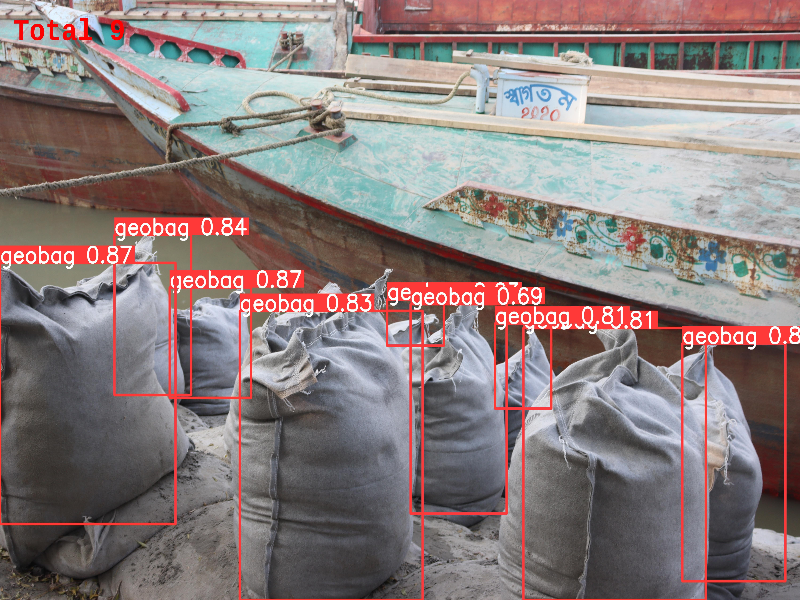

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image  # Importing the Image module from the PIL library
# Run batched inference on a list of images
model = YOLO('/content/drive/MyDrive/Projects/yolo_count/runs/detect/train14/weights/best.pt')

results = model.predict(source='/content/Copy of 31.JPG', conf=0.4, show_labels=True)


from PIL import Image, ImageFont, ImageDraw
def add_text(im, text, topleft, size, color):
    # font = ImageFont.truetype("/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf", size)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", size)
    draw = ImageDraw.Draw(im)
    draw.text(topleft, text, font=font, fill=color) # put the text on the image
    return im



# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    c = len(result.boxes.data)  # counting total box

    save_path = '/content/result.jpg'  # Saving result to a fixed file name
    result.save(filename=save_path)  # Save to disk
    c_img = Image.open(save_path)
    c_img = add_text(c_img, "Total {}".format(c), (100, 100), 200, (255, 0, 0))
    c_img.save(save_path)
    img = cv2.imread(save_path)
    img = cv2.resize(img,(800,600))
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
